In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/nonlinear_data.csv')
df.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


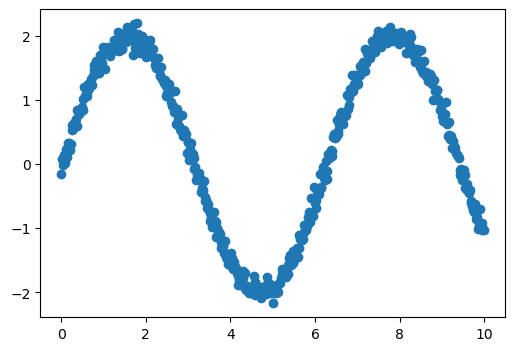

In [142]:
plt.figure(figsize=(6, 4))
plt.scatter(df[['x']], df['y'])

# Correlation

In [143]:
df.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


# Polynomial feature transformation

In [144]:
from sklearn.preprocessing import PolynomialFeatures

polyObj = PolynomialFeatures(degree=6)
polyObj = polyObj.fit_transform(df[['x']])
polyObj

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00400802e-02, 4.01604813e-04, ...,
        1.61286426e-07, 3.23219290e-09, 6.47734048e-11],
       [1.00000000e+00, 4.00801603e-02, 1.60641925e-03, ...,
        2.58058281e-06, 1.03430173e-07, 4.14549791e-09],
       ...,
       [1.00000000e+00, 9.95991984e+00, 9.92000032e+01, ...,
        9.84064064e+03, 9.80119919e+04, 9.76191583e+05],
       [1.00000000e+00, 9.97995992e+00, 9.95996000e+01, ...,
        9.92008032e+03, 9.90020040e+04, 9.88036032e+05],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, ...,
        1.00000000e+04, 1.00000000e+05, 1.00000000e+06]])

In [145]:
polyObj.shape

(500, 7)

In [146]:
pd.DataFrame(polyObj)

,0,1,2,3,4,5,6
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07
...,...,...,...,...,...,...,...
495,1.0,9.91984,98.403219,976.144159,9.683194e+03,9.605573e+04,9.528574e+05
496,1.0,9.93988,98.801210,982.072144,9.761679e+03,9.702992e+04,9.644657e+05
497,1.0,9.95992,99.200003,988.024080,9.840641e+03,9.801199e+04,9.761916e+05
498,1.0,9.97996,99.599600,994.000016,9.920080e+03,9.900200e+04,9.880360e+05


In [147]:
xTrain = polyObj
yTrain = df['y']
xTrain
# yTrain

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00400802e-02, 4.01604813e-04, ...,
        1.61286426e-07, 3.23219290e-09, 6.47734048e-11],
       [1.00000000e+00, 4.00801603e-02, 1.60641925e-03, ...,
        2.58058281e-06, 1.03430173e-07, 4.14549791e-09],
       ...,
       [1.00000000e+00, 9.95991984e+00, 9.92000032e+01, ...,
        9.84064064e+03, 9.80119919e+04, 9.76191583e+05],
       [1.00000000e+00, 9.97995992e+00, 9.95996000e+01, ...,
        9.92008032e+03, 9.90020040e+04, 9.88036032e+05],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, ...,
        1.00000000e+04, 1.00000000e+05, 1.00000000e+06]])

# Train Polynomial Regression with Linear Regression Model

In [148]:
from sklearn.linear_model import LinearRegression

lrReg = LinearRegression()
lrReg.fit(xTrain, yTrain)


LinearRegression()

# R Square score

In [149]:
from sklearn.metrics import r2_score
r2_score = lrReg.score(xTrain, yTrain)
print(r2_score)


0.9930624844497352


In [150]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xTrain, yTrain, test_size=0.30, random_state=2)

In [151]:
pd.DataFrame(xTrain)

,0,1,2,3,4,5,6
0,1.0,2.384770,5.687126,13.562484,32.343399,77.131554,183.940979
1,1.0,6.713427,45.070100,302.574820,2031.313925,13637.077451,91551.521968
2,1.0,3.847695,14.804760,56.964206,219.180913,843.341390,3244.920779
3,1.0,3.567134,12.724447,45.389811,161.911549,577.560234,2060.234902
4,1.0,5.671343,32.164128,182.413791,1034.531121,5867.180504,33274.791235
...,...,...,...,...,...,...,...
345,1.0,0.440882,0.194377,0.085697,0.037782,0.016658,0.007344
346,1.0,1.442886,2.081919,3.003972,4.334388,6.254027,9.023847
347,1.0,9.879760,97.609648,964.359850,9527.643413,94130.825701,929989.921256
348,1.0,0.300601,0.090361,0.027163,0.008165,0.002454,0.000738


In [152]:
xTrain.shape

(350, 7)

In [153]:
xTest.shape

(150, 7)

In [154]:
xTest

array([[1.00000000e+00, 2.58517034e+00, 6.68310569e+00, ...,
        4.46639017e+01, 1.15463794e+02, 2.98493575e+02],
       [1.00000000e+00, 5.61122244e+00, 3.14858173e+01, ...,
        9.91356693e+02, 5.56272292e+03, 3.12136757e+04],
       [1.00000000e+00, 8.81763527e+00, 7.77506918e+01, ...,
        6.04517007e+03, 5.33041048e+04, 4.70016155e+05],
       ...,
       [1.00000000e+00, 7.15430862e+00, 5.11841318e+01, ...,
        2.61981535e+03, 1.87429675e+04, 1.34092974e+05],
       [1.00000000e+00, 6.65330661e+00, 4.42664889e+01, ...,
        1.95952204e+03, 1.30373009e+04, 8.67411606e+04],
       [1.00000000e+00, 6.91382766e+00, 4.78010128e+01, ...,
        2.28493683e+03, 1.57976594e+04, 1.09222295e+05]])

In [155]:
trainSplit = lrReg.fit(xTrain, yTrain)
trainSplit

LinearRegression()

In [156]:
testSplit = lrReg.fit(xTest, yTest)
testSplit

LinearRegression()

In [157]:
trainnigScore = trainSplit.score(xTrain, yTrain)
trainnigScore

0.9928493550602766

In [158]:
testingScore = testSplit.score(xTest, yTest)
testingScore

0.9927315397590115

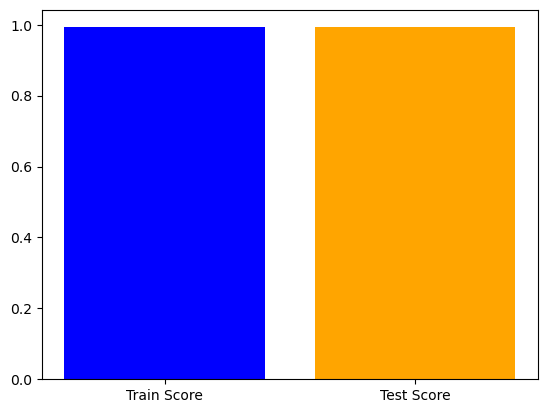

In [159]:
plt.bar(['Train Score', 'Test Score'], [trainnigScore, testingScore], color=['blue', 'orange'])
plt.show()

In [180]:
pd.DataFrame(xTrain[[0]])

,0,1,2,3,4,5,6
0,1.0,2.38477,5.687126,13.562484,32.343399,77.131554,183.940979


In [170]:
df.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [173]:
pd.DataFrame(lrReg.predict(xTrain))

,0
0,1.336887
1,0.759152
2,-1.277238
3,-0.836495
4,-1.168992
...,...
345,0.826597
346,2.049493
347,-0.774859
348,0.546573


In [186]:
xTrain[[0]]

array([[  1.        ,   2.38476954,   5.68712575,  13.56248426,
         32.34339935,  77.13155355, 183.94097942]])

In [196]:
singlePrediction = lrReg.predict(xTrain[[0]])
singlePrediction

array([1.33688665])

In [ ]:
dummyPred = [1.000, 3.38476954, 4.68712575, 13.56248426, 30.34339935, 70.13155355, 180.94097942]
dummyPrednp = np.array(dummyPred)
dummyPrednp
singlePredictionDummy = lrReg.predict([dummyPred])
singlePredictionDummy

array([1.80755992])